In [19]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
#import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib as mpl
from scipy import stats
from utils import analyze_order

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [20]:
os.chdir('C:\\Users\\loren\\OneDrive\\Desktop\\PhD\\Progetto\\python\\')
path = 'data'

In [21]:
df = pd.read_csv(os.path.join(path, "ue27_df.csv"))

In [22]:
df['Time'] = pd.to_datetime(df['Time'], format="%Y-%m-%d")
df['Time'] = df['Time'].dt.strftime('%Y-%m')

In [23]:
#df.set_index('Time', inplace=True)

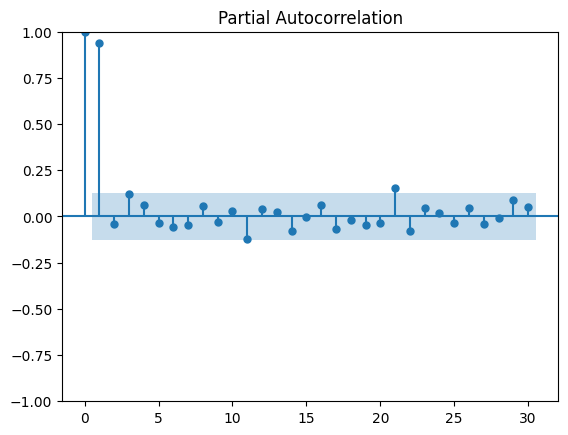

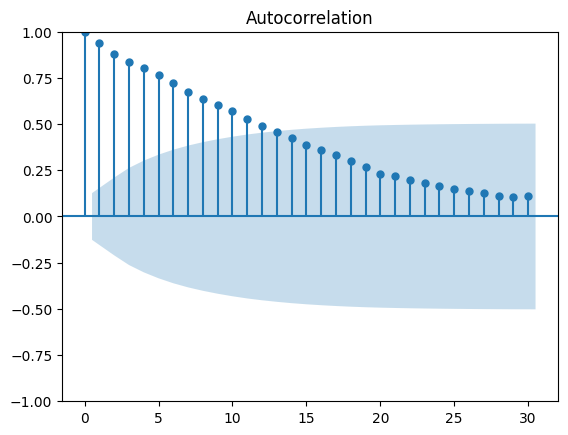

In [24]:
pacf = plot_pacf(df.IP, lags=30)

acf = plot_acf(df.IP, lags=30)

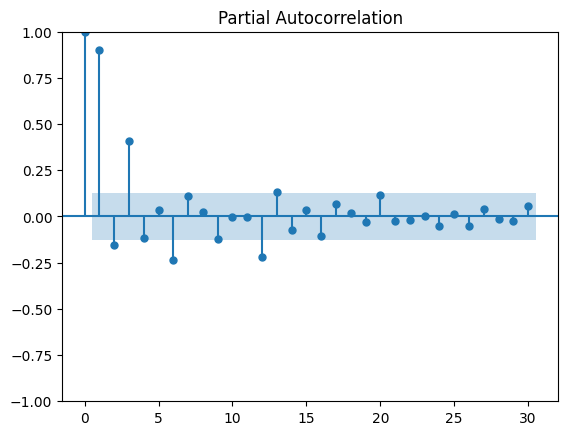

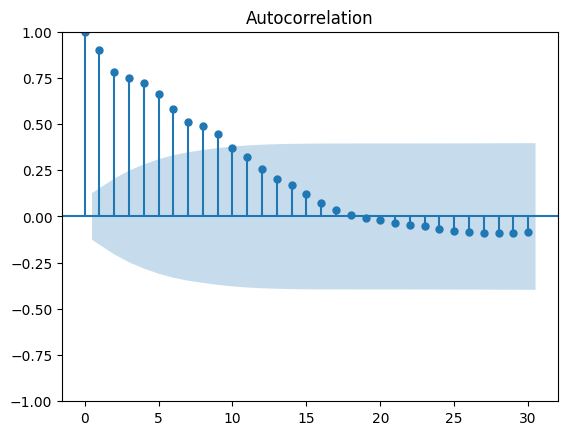

In [25]:
pacf = plot_pacf(df.GAS_PRICE, lags=30)

acf = plot_acf(df.GAS_PRICE, lags=30)

In [26]:
adf_ip = adfuller(df.IP)
print('value',adf_ip[0])
print('p-value',adf_ip[1])

value -1.906419814446655
p-value 0.32904708060949134


In [27]:
adf_gp = adfuller(df.GAS_PRICE)
print('value', adf_gp[0])
print('p-value', adf_gp[1])

value -3.0384825158221407
p-value 0.03145357331650854


In [28]:
df.IP.describe()

count    240.000000
mean     100.643333
std        7.208093
min       76.000000
25%       95.300000
50%      100.450000
75%      106.725000
max      116.100000
Name: IP, dtype: float64

In [29]:
orders = [(p, d, q) for p in range(4) for d in range(2) for q in range(4)]

# Dictionary to store order, summary, and residuals
order_results = {}
warning_orders = []  # List to track orders with the specific warning

# Fit models and store summaries
for order in orders:
    try:
        with warnings.catch_warnings(record=True) as w:
            # Filter specific warnings
            warnings.simplefilter("always")
            
            # Fit the ARIMA model
            model = ARIMA(df['IP'], order=order)
            model_fit = model.fit()
            
            # Store the summary and residuals in the dictionary
            order_results[order] = {
                "summary": model_fit.summary(),
                "residuals": model_fit.resid
            }
            
            # Check if the specific warning occurred
            for warning in w:
                if "Non-invertible starting MA parameters found" in str(warning.message):
                    warning_orders.append(order)
    
    except Exception as e:
        # Handle exceptions (e.g., if a model can't be fit)
        print(f"Failed to fit model for order {order}: {e}")

# Display orders that triggered the warning
print("Orders with non-invertible starting MA parameters warning:", warning_orders)

Orders with non-invertible starting MA parameters warning: [(0, 0, 1), (2, 0, 1)]


Summary for ARIMA order (2, 0, 2):

                               SARIMAX Results                                
Dep. Variable:                     IP   No. Observations:                  240
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -525.065
Date:                Sun, 01 Dec 2024   AIC                           1062.130
Time:                        18:25:45   BIC                           1083.014
Sample:                             0   HQIC                          1070.545
                                - 240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.2298      4.283     23.637      0.000      92.836     109.624
ar.L1          1.2831      0.279      4.597      0.000       0.736       1.830
ar.L2         -0

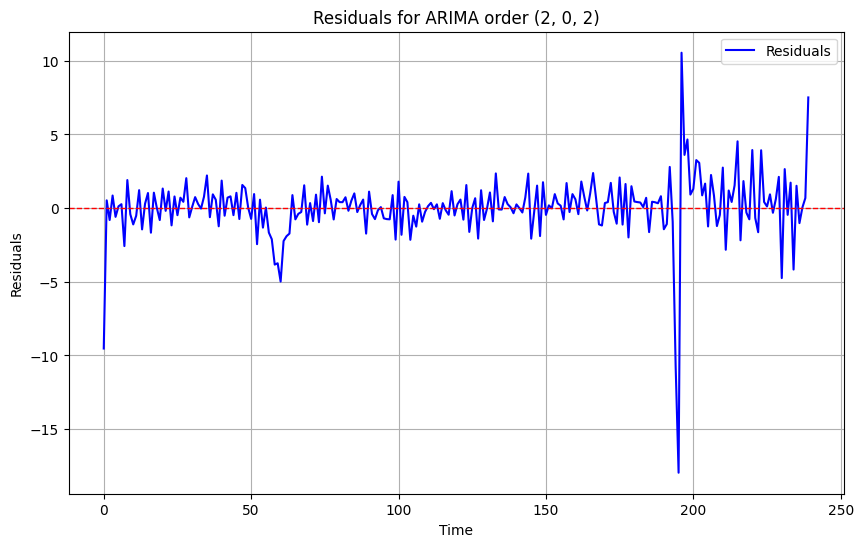

In [30]:
analyze_order((2, 0, 2), order_results)